# Classifiation using Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('D8data1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.shape

(400, 5)

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

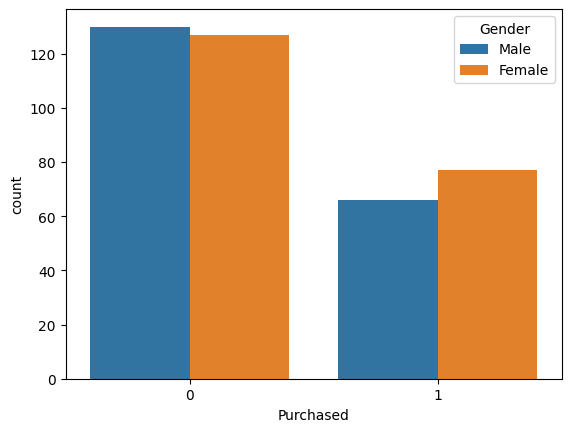

In [14]:
sns.countplot(x=df['Purchased'],hue=df['Gender'])

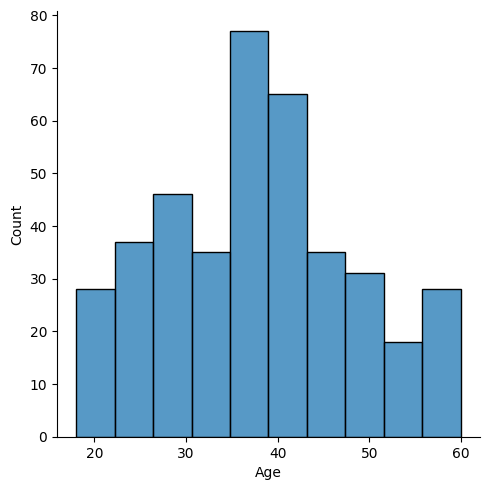

In [20]:
sns.displot(df['Age'])

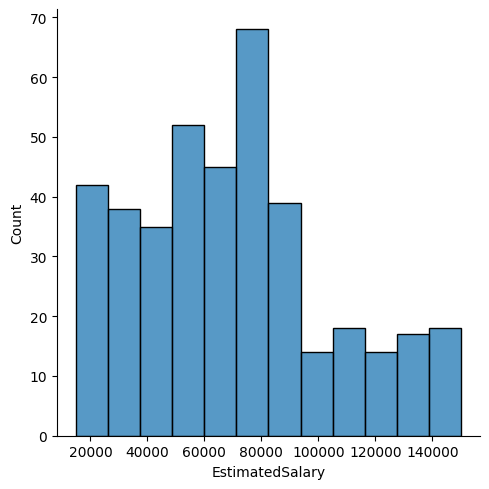

In [22]:
sns.displot(df['EstimatedSalary'])

In [23]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [24]:
gen_dummies = pd.get_dummies(df['Gender'])

In [25]:
gen_dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [27]:
df.drop(columns='Gender',inplace=True,axis=1)

In [28]:
df

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [30]:
df=pd.concat([df,gen_dummies],axis=1)

In [32]:
df.drop(columns='User ID',inplace=True)

In [33]:
df

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [35]:
x = df[['Age','EstimatedSalary','Female','Male']]

In [37]:
y = df[['Purchased']]

In [39]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
x_train = StandardScaler().fit_transform(x_train)

In [55]:
x_test = StandardScaler().fit_transform(x_test)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
mod = LogisticRegression()

In [58]:
mod.fit(x_train,y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [59]:
pred = mod.predict(x_test)

In [60]:
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [62]:
confusion_matrix(y_test,pred)

array([[60,  8],
       [13, 19]], dtype=int64)

In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        68
           1       0.70      0.59      0.64        32

    accuracy                           0.79       100
   macro avg       0.76      0.74      0.75       100
weighted avg       0.78      0.79      0.78       100



In [64]:
print(accuracy_score(y_test,pred))

0.79


## Building Model with K-NN Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn_mod = KNeighborsClassifier(n_neighbors=5)

In [67]:
knn_mod.fit(x_train,y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [69]:
y_pred = knn_mod.predict(x_test)

In [71]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [73]:
confusion_matrix(y_test,y_pred)

array([[59,  9],
       [ 2, 30]], dtype=int64)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91        68
           1       0.77      0.94      0.85        32

    accuracy                           0.89       100
   macro avg       0.87      0.90      0.88       100
weighted avg       0.90      0.89      0.89       100



In [75]:
print(accuracy_score(y_test,y_pred))

0.89
